# Diamond Price Prediction - EDA

## Importing Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Ingestion

In [28]:
df = pd.read_csv("data/gemstone.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [29]:
df.drop(columns='Unnamed: 0', inplace=True)

In [30]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [31]:
df.shape

(26967, 10)

#### Check missing values.

In [32]:

df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

- There are 697 missing values in depth column

#### Check duplicates

In [33]:

df.duplicated().sum()

34

- There are 34 duplicate values

In [34]:
# dropping duplicate records
df.drop_duplicates(inplace=True)

#### Segregating numerical and categorical columns

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [36]:
numerical_cols = df.columns[df.dtypes!='object']
categorical_cols = df.columns[df.dtypes=='object']

print('Numerical columns: ',numerical_cols)
print('Categorical columns: ', categorical_cols)

Numerical columns:  Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical columns:  Index(['cut', 'color', 'clarity'], dtype='object')


In [37]:
df[categorical_cols].describe()

,cut,color,clarity
count,26933,26933,26933
unique,5,7,8
top,Ideal,G,SI1
freq,10805,5653,6565


In [38]:
df.cut.value_counts()

cut
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: count, dtype: int64

In [39]:
df.color.value_counts()

color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: count, dtype: int64

In [40]:
df.clarity.value_counts()

clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: count, dtype: int64

#### Hist plot of every numerical columns

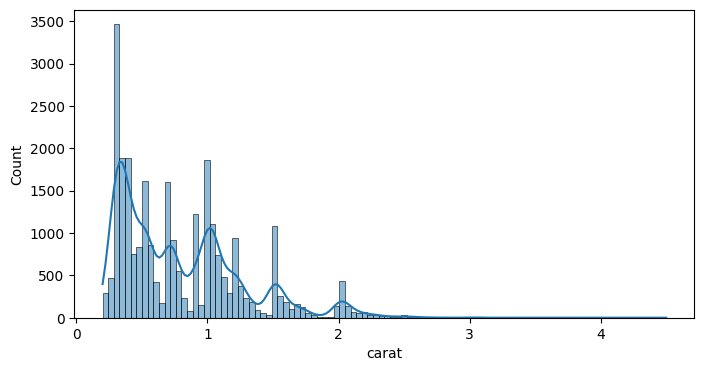

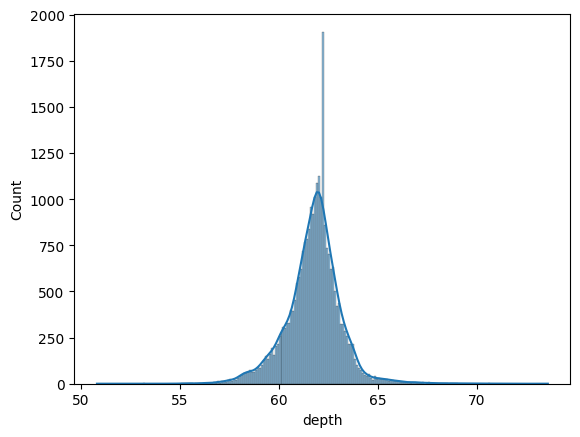

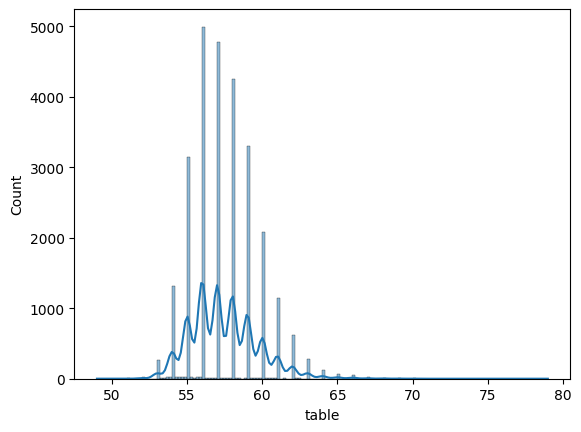

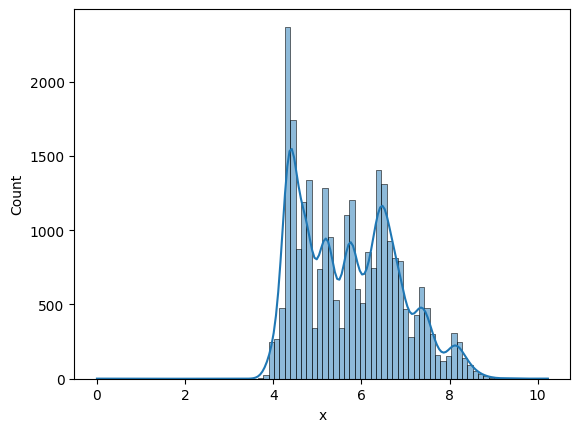

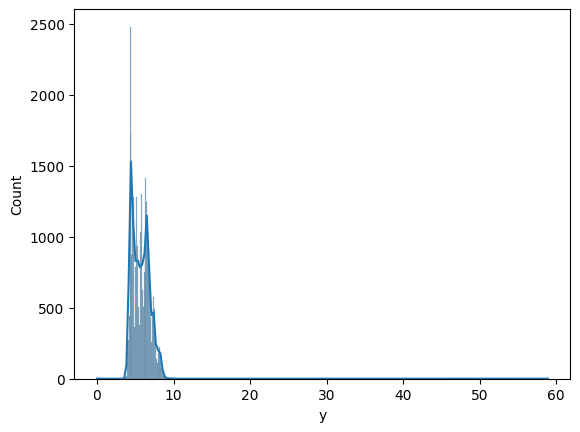

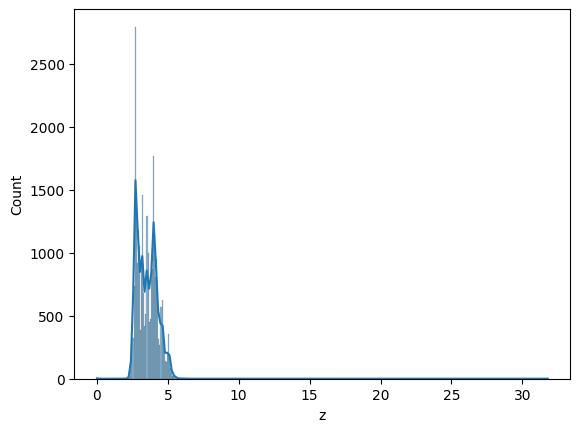

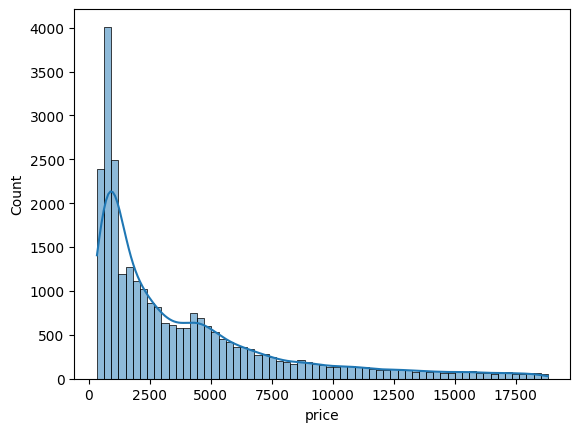

In [41]:
plt.figure(figsize=(8,4))
x = 0
for i in numerical_cols:
    sns.histplot(data=df, x = i, kde=True)
  
    plt.show()

#### cat plot for every categorical columns

<Figure size 300x200 with 0 Axes>

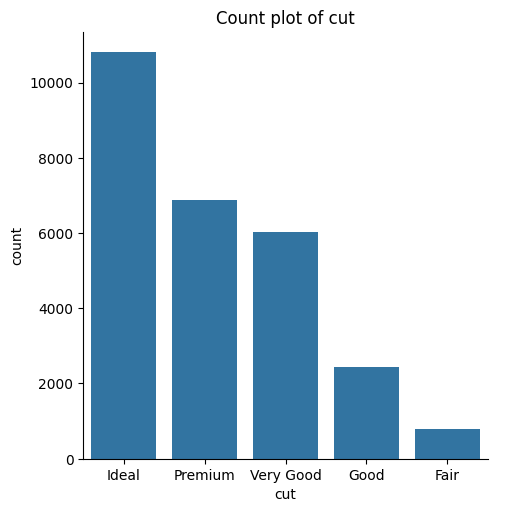

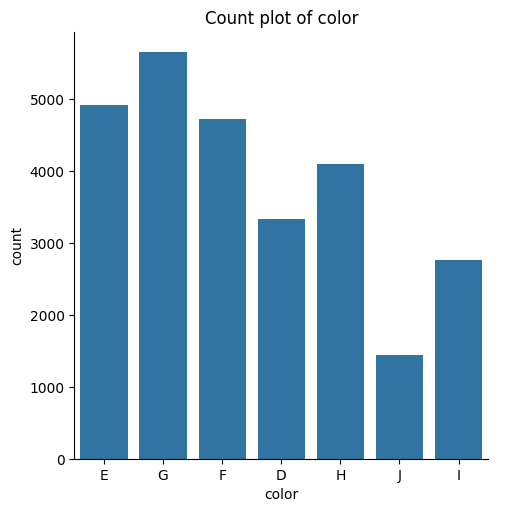

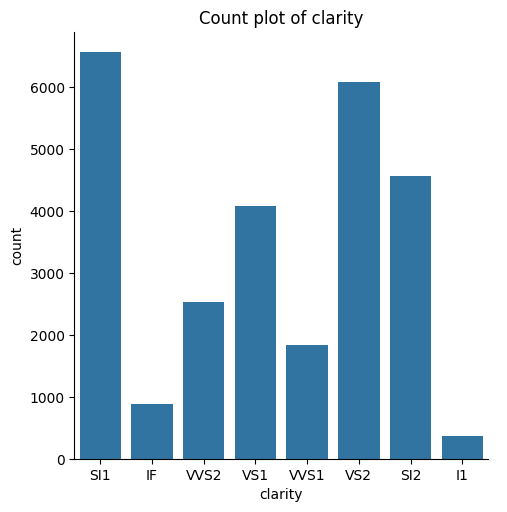

In [42]:
plt.figure(figsize=(3,2))

for i in categorical_cols:
    sns.catplot(x=i, data=df, kind='count')
    plt.title(f"Count plot of {i}")
    plt.show()


#### Correlation

<Axes: >

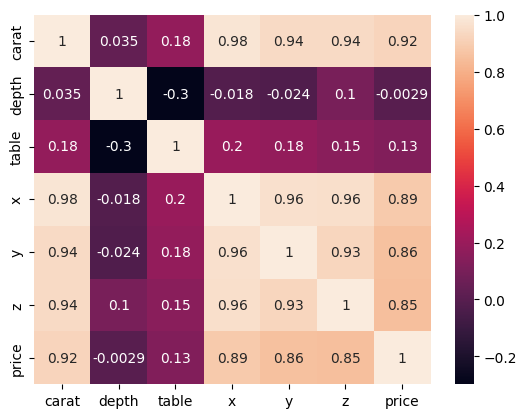

In [43]:
sns.heatmap(df[numerical_cols].corr(), annot=True)

- x,y,z are very much correlated and caret and x are also correlated hence we can ommit x, y and z columns 

In [44]:
# df.drop(labels=['x','y', 'z'], axis = 1)

In [45]:
df.to_csv('data/cleaned_gemstone.csv', index=False)

#### Ranking the categorical features

In [19]:
df.cut.unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

- Domain Knowledge resource: American gem society
- Link: https://www.americangemsociety.org/ags-diamond-grading-system/

In [20]:
cut_map = {"Fair": 1,"Good": 2,"Very Good": 3,"Premium": 4,"Ideal" : 5}      
  

In [21]:
df.clarity.unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [22]:
clarity_map = {"I1":1,"SI2":2,"SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8} 

In [23]:
df.color.unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [24]:
color_map = {'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7} 

In [25]:
df['cut'] = df['cut'].map(cut_map)
df['color'] = df['color'].map(color_map)
df['clarity'] = df['clarity'].map(clarity_map)

In [26]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,60.4,59.0,4.35,4.43,2.65,779
